# Plot positions on a blank map

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/plotting_blank_map.html

This example showcases how to plot positions on a blank map.
It is often useful to plot coordinate positions of events on a blank helioprojective coordinate map.
In this example, we create an empty map with a WCS defined by a helioprojective frame as observed from
Earth at a certain time, and show how you can plot different coordinates on it.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames

First we will create a blank map using with an array of zeros.
Since there is no WCS information, we will need to construct a header to pass to Map.

In [ ]:
data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28',
                    observer='earth', frame=frames.Helioprojective)

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

Now we have constructed the map, we can plot it and mark important locations to it.
Initialize the plot and add the map to it

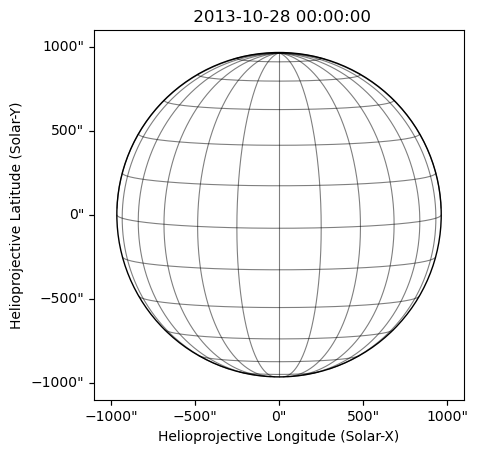

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")
plt.show()

Coordinates that are being plotted - (0, 0), (50, 100) and (400, 400).

In [ ]:
xc = [0, 50, 400] * u.arcsec
yc = [0, 100, 400] * u.arcsec

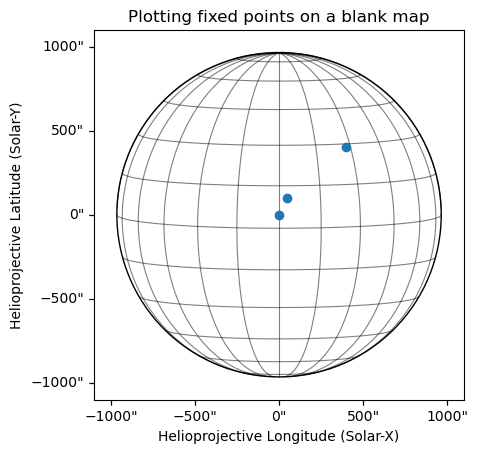

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")

coords = SkyCoord(xc, yc, frame=blank_map.coordinate_frame)
ax.plot_coord(coords, 'o')
ax.set_title('Plotting fixed points on a blank map')
plt.show()

Plot the blank map with the specified coordinates.  Note that the marker for
(0, 0) in helioprojective coordinates is at the center of the solar disk, yet
the heliographic equator (zero degrees latitude) does not go through the disk
center and instead curves below it.  The reason for that is the observer,
specified as Earth in this example, is almost always at non-zero heliographic
latitude, and disk center as seen by such an observer will have that same
heliographic latitude.  The `sunpy.coordinates.sun.B0` function returns
Earth's heliographic latitude at a specified time.

In [ ]:
sunpy.coordinates.sun.B0?

Signature: sunpy.coordinates.sun.B0(time='now')
Docstring:
Return the B0 angle for the Sun at a specified time, which is the heliographic latitude of the
of the center of the disk of the Sun as seen from Earth. The range of B0 is +/-7.23 degrees.

Equivalent definitions include:
    * The heliographic latitude of Earth
    * The tilt of the solar North rotational axis toward Earth

Parameters
----------
time : `tuple`, `list`, `str`, `pandas.Timestamp`, `pandas.Series`, `pandas.DatetimeIndex`, `datetime.datetime`, `datetime.date`, `numpy.datetime64`, `numpy.ndarray`, `astropy.time.Time`
    Time to use in a parse_time-compatible format

Returns
-------
out : `~astropy.coordinates.Latitude`
    The position angle
File:      c:\users\usr\miniconda3\envs\cal\lib\site-packages\sunpy\coordinates\sun.py
Type:      function

In [ ]:
sunpy.coordinates.sun.B0(time='2013-10-28')

<Latitude 4.77115706 deg>

In [ ]:
sunpy.coordinates.sun.B0(time='2013-10-28').value

np.float64(4.7711570596394)

In [ ]:
blank_map.coordinate_frame

<Helioprojective Frame (obstime=2013-10-28T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2013-10-28T00:00:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., 4.77115706, 1.48644586e+11)>)>